# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание данных

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

*Условия задачи:*

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


None

'Количество дубликатов:'

0

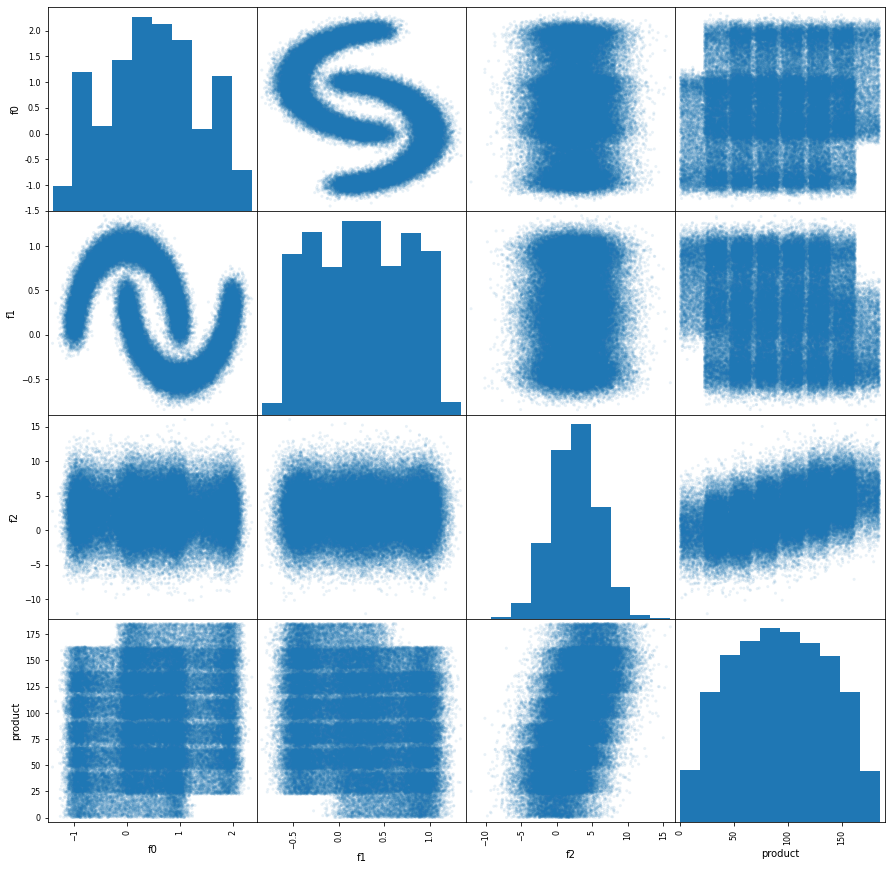

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


None

'Количество дубликатов:'

0

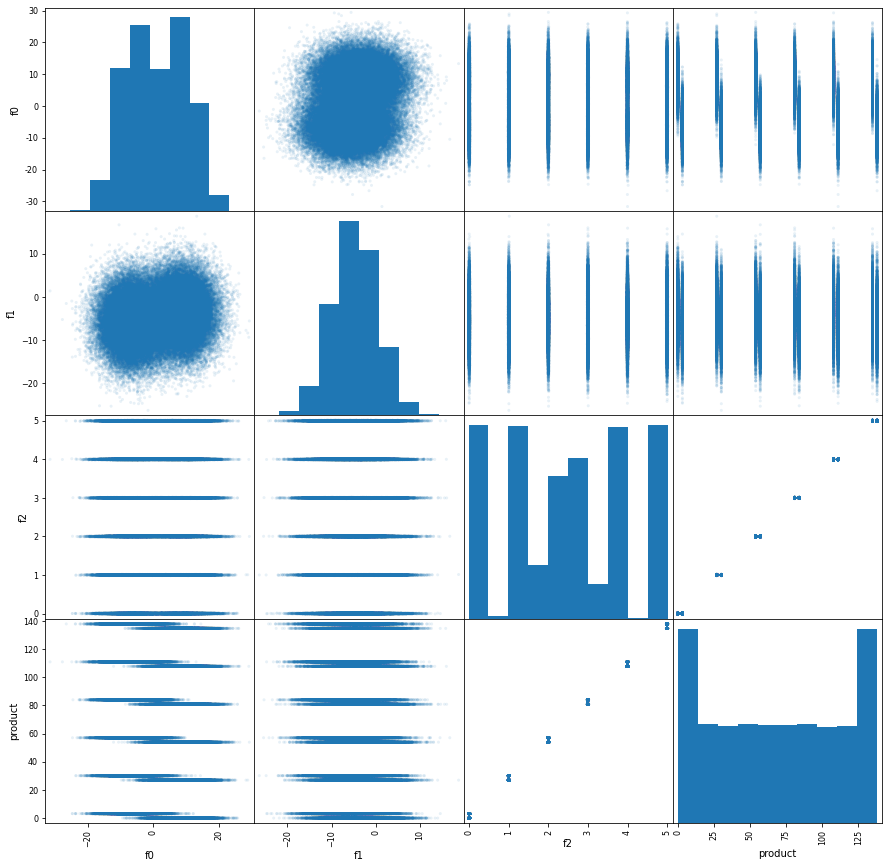

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


None

'Количество дубликатов:'

0

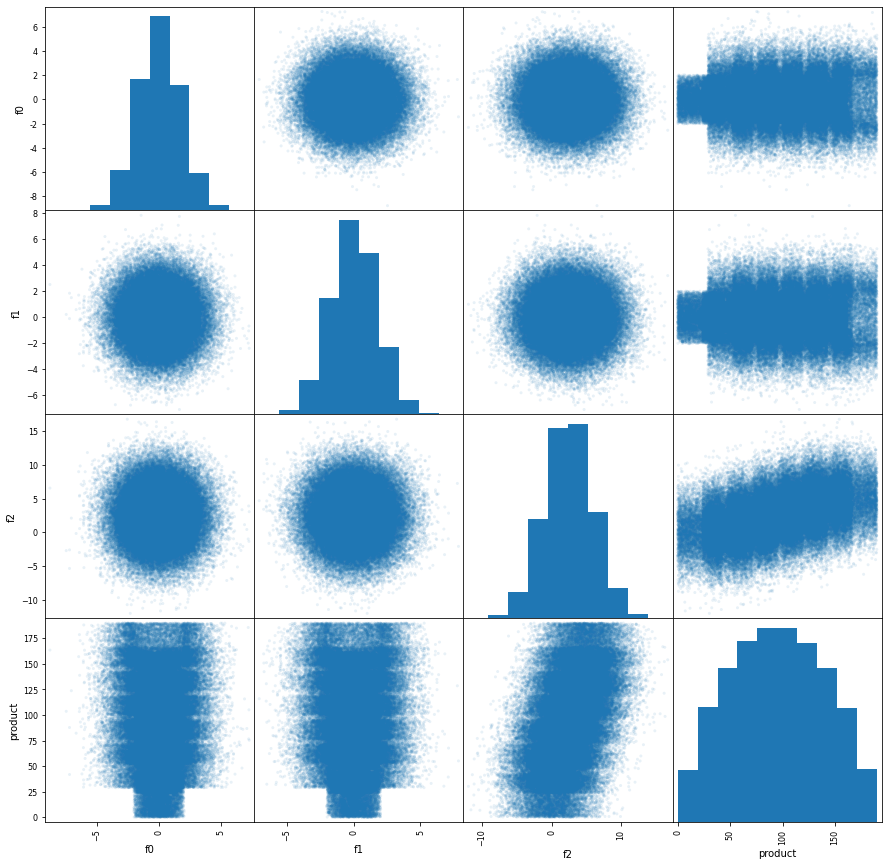

In [2]:
links_file = {0:['/datasets/geo_data_0.csv', r'C:\Users\vadim.pilipenko\Desktop\личное\Практикум\ML\прочее\geo_data_0'],
             1:['/datasets/geo_data_1.csv', r'C:\Users\vadim.pilipenko\Desktop\личное\Практикум\ML\прочее\geo_data_1'],
             2:['/datasets/geo_data_2.csv', r'C:\Users\vadim.pilipenko\Desktop\личное\Практикум\ML\прочее\geo_data_2']
             }
# Создаем функцию открытия файла по ссылкам
def open_fun(dic_links,numb): 
    list_l = dic_links[numb]
    try:
        frame = pd.read_csv(list_l[0])
    except:
        frame = pd.read_csv(list_l[1])
    return frame

geo_data_0 = pd.DataFrame()
geo_data_1 = pd.DataFrame()
geo_data_2 = pd.DataFrame()

data_list = [geo_data_0, geo_data_1, geo_data_2] # Создаем список для сохранения датафреймов
for i in range(len(data_list)):
    data_list[i] = open_fun(links_file, i) # открываем
    display(data_list[i].head(10), data_list[i].info(),'Количество дубликатов:', data_list[i].duplicated().sum()) # Смотрим
    pd.plotting.scatter_matrix(data_list[i],figsize=(15,15),alpha=0.1)
    plt.show()
#    for val in data_list[i].columns:
#        print(data_list[i][val].describe())


### Вывод:
Открыли и посмотрели данные, предобработки не требуется, матрицы корреляции рассмотрены

## Обучение и проверка модели

In [3]:
# Создаем функцию для модели линейной регрессии с выдачей трагета, предсказаний и RMSE
def lr_targ_pred_rmse_model(data, target, reg, prints=True, test_size=0.25, return_model=False): 
    for val in data.columns: # удалим индетификаторы скважин, нам для модели достаточно индексов
        if data[val].dtypes == 'object':
            data = data.drop(columns=val)

    features = data.drop(target,axis=1)
    target = data[target]
    
    features_train, features_valid,  target_train, target_valid = train_test_split(
    features, target, test_size=test_size, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train, target_train) # обучение модели на тренировочной выборке
    predictions_valid = model.predict(features_valid) # предсказания модели на валидационной выборке

    rmse = mean_squared_error(target_valid, predictions_valid)**0.5
    if prints == True:
        print(f'''Средний запас предсказанного сырья региона {reg} = {predictions_valid.mean()},
        RMSE для модели{reg} ={rmse}
        ''')
    else:
        print()
    if return_model == False:
        return target_valid, predictions_valid, rmse
    else:
        target_valid, predictions_valid, rmse, model

In [4]:
# Посмотрим результаты по регионам
target_geo_0, predictions_geo_0, rmse_geo_0 = lr_targ_pred_rmse_model(data_list[0],'product', 0)
target_geo_0 = target_geo_0.reset_index(drop=True)
predictions_geo_0 = pd.Series(predictions_geo_0)
predictions_geo_0 = predictions_geo_0.reset_index(drop=True)

target_geo_1, predictions_geo_1, rmse_geo_1 = lr_targ_pred_rmse_model(data_list[1],'product', 1)
target_geo_1 = target_geo_1.reset_index(drop=True)
predictions_geo_1 = pd.Series(predictions_geo_1)
predictions_geo_1 = predictions_geo_1.reset_index(drop=True)

target_geo_2, predictions_geo_2, rmse_geo_2 = lr_targ_pred_rmse_model(data_list[2],'product', 2)
target_geo_2 = target_geo_2.reset_index(drop=True)
predictions_geo_2 = pd.Series(predictions_geo_2)
predictions_geo_2 = predictions_geo_2.reset_index(drop=True)

# Создаем список результатов по регионам для дальнейшей работы
region_target_predict = {'Регион_0':[target_geo_0, predictions_geo_0],
                        'Регион_1':[target_geo_1, predictions_geo_1],
                        'Регион_2':[target_geo_2, predictions_geo_2],}

Средний запас предсказанного сырья региона 0 = 92.59256778438035,
        RMSE для модели0 =37.5794217150813
        
Средний запас предсказанного сырья региона 1 = 68.728546895446,
        RMSE для модели1 =0.893099286775617
        
Средний запас предсказанного сырья региона 2 = 94.96504596800489,
        RMSE для модели2 =40.02970873393434
        


### Вывод:
Запасы в Регионе 0 и Регионе 2 в среднем выше, чем в Регионе 1, но гораздо менее предсказуемы, что не очень хорошо
Для улучшения результата я бы попробовал иные виды регрессий.

## Подготовка к расчёту прибыли

In [5]:
# Создаем константы бизнесметрик
invest = 10000000000
income_per_1 = 450000
pieces = 200
profitab_point = invest/(income_per_1*pieces)
print('Количество нефти для рентабельности скважины:', round(profitab_point,3))
print('Количество нефти в 200 скважинах для рентабельности региона:', round(profitab_point*pieces,3))

Количество нефти для рентабельности скважины: 111.111
Количество нефти в 200 скважинах для рентабельности региона: 22222.222


## Расчёт прибыли и рисков 

In [6]:
# Создаем функцию по подсчету дохода с региона
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return selected.sum()*income_per_1

state = np.random.RandomState(12345)

for val in region_target_predict:
    values = []
    for i in range(1000): # цикл бутстрэпа
        t_subsample = region_target_predict[val][0].sample(n=500, replace=True, random_state=state)
        p_subsample = region_target_predict[val][1][t_subsample.index]
        rev = revenue(t_subsample, p_subsample, 200)
        values.append(rev)

    values = pd.Series(values)
    lower = values.quantile(0.025)# определение доверительного интервала
    higer = values.quantile(0.975)
    mean = values.mean()
    procent=0.0
    while values.quantile(procent)-invest <= 0: # Определение риска убытка
        procent +=0.001
    
    print(f''' Средняя прибыль {val} = {round(mean-invest,2)} рублей или {round((mean-invest)/1000000,2)} миллионов рублей.
    95%-й доверительный интервал прибыли для {val} = {round(lower-invest,2)} : {round(higer-invest,2)} рублей 
    или {round((lower-invest)/1000000,2)} : {round((higer-invest)/1000000,2)} миллионов рублей.
    Риск убытка в {val} = {round(procent*100,3)}%
    ''')

 Средняя прибыль Регион_0 = 425938526.91 рублей или 425.94 миллионов рублей.
    95%-й доверительный интервал прибыли для Регион_0 = -102090094.84 : 947976353.36 рублей 
    или -102.09 : 947.98 миллионов рублей.
    Риск убытка в Регион_0 = 6.0%
    
 Средняя прибыль Регион_1 = 518259493.7 рублей или 518.26 миллионов рублей.
    95%-й доверительный интервал прибыли для Регион_1 = 128123231.43 : 953612982.07 рублей 
    или 128.12 : 953.61 миллионов рублей.
    Риск убытка в Регион_1 = 0.3%
    
 Средняя прибыль Регион_2 = 420194005.34 рублей или 420.19 миллионов рублей.
    95%-й доверительный интервал прибыли для Регион_2 = -115852609.16 : 989629939.84 рублей 
    или -115.85 : 989.63 миллионов рублей.
    Риск убытка в Регион_2 = 6.2%
    


## Вывод

Основываясь на модели опеределения количества нефти по регионам и проведя анализ распределения результатов по регионам на валидационной выборке, оптимален для разработки регион 1, с средней прибылью при инвестировании в 420.2 миллиона рублей при 95% доверительном интервале 128.12 : 953.61 миллионов рублей и вероятностью убытка в 0.3%.